### Notes and Refrences

This document explores a general process for loading, filtering, dimention reduction and clustering using PCA and K-means.

Evalutation is done with distence calculations and silhoutte analysis

See: 

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


Drachen, A., Sifa, R., Bauckhage, C., & Thurau, C. (2012). Guns, swords and data: Clustering of player behavior in computer games in the wild. 2012 IEEE Conference on Computational Intelligence and Games (CIG), 163–170. https://doi.org/10.1109/CIG.2012.6374152


In [0]:

#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - Author, Date: Created as copy of Old Notebook (`Old Title`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
JUPYTER_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
from math import pi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append('.')
import utils

### Imports

In [0]:
# import libraries
import ipywidgets as widgets
import numpy as np
import pandas as pd
import urllib.request
from matplotlib import pyplot as plt
from math import ceil
pd.options.display.max_columns = 1000
from google.colab import files
from zipfile import ZipFile
from io import BytesIO
from scipy import stats
# import local python files
import importlib
import Notebooks.Clustering.cluster_utils as cu
import Notebooks.Clustering.cluster_workflow as cw
importlib.reload(cu)
importlib.reload(cw)

<module 'Notebooks.Clustering.cluster_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter/Notebooks/Clustering/cluster_utils.py'>

In [0]:
JUPYTER_DIR

'/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter'

### Set Vars

#### Set Options:

In [0]:
options = cu.options.lakeland_player_lvl01
print(*str(options).split(','), sep='\n')

Options(game='lakeland'
 name='player_lvl01'
 filter_args={'query_list': ['sess_avg_num_tiles_hovered_before_placing_home > 1']
 'verbose': False
 'fillna': 0}
 new_feat_args={'avg_tile_hover_lvl_range': range(0
 2)}
 lvlfeats=['count_buy_home'
 'count_buy_farm'
 'count_buy_livestock'
 'count_buys']
 lvlrange=range(0
 2)
 finalfeats=['weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm'
 'sum_lvl_0_to_1_count_buy_home'
 'sum_lvl_0_to_1_count_buy_farm'
 'sum_lvl_0_to_1_count_buy_livestock'
 'sum_lvl_0_to_1_count_buys']
 zthresh=3
 finalfeats_readable=['hovers\nbefore\nfarm'
 'home'
 'farm'
 'livestock'
 'buys'])


#### Set Base Savepath:

In [0]:
base_savepath = f'Results/{options.game.lower().capitalize()}/{options.name}_logtransform'
sp_t = widgets.Text(
    value= base_savepath,
    placeholder='Type something',
    description='Base SPath',
    layout = widgets.Layout(width='80%'),
    disabled=False
)
display(sp_t)

Text(value='Results/Lakeland/player_lvl01_logtransform', description='Base SPath', layout=Layout(width='80%'),…

In [0]:
base_savepath = sp_t.value
print(f'Saving under: {base_savepath}/')

Saving under: Graphs/Lakeland/player_lvl01_logtransform/


#### Set Other:

In [0]:
dpi=150 #@param {type:"integer"}

## Pipeline

#### Run Filter and Minor Vis

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1599) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter/Notebooks/Clustering/cluster_utils.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sum_prefix+fn] = tdf.sum(axis=1)
/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter/Notebooks/Clustering/cluster_utils.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

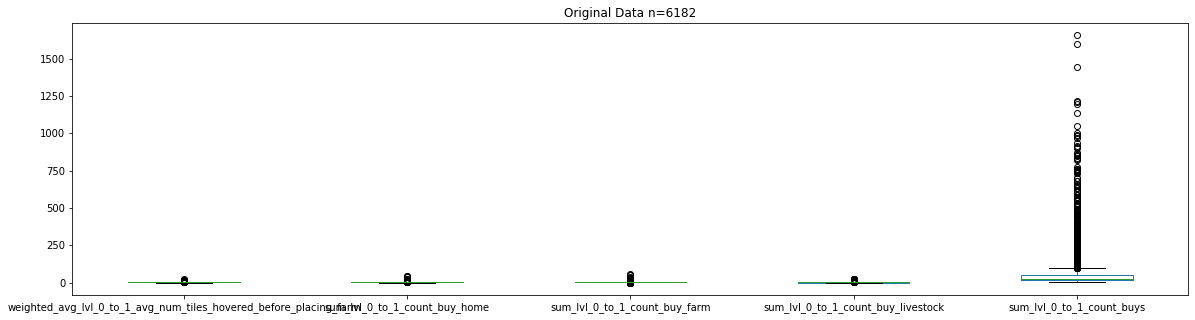

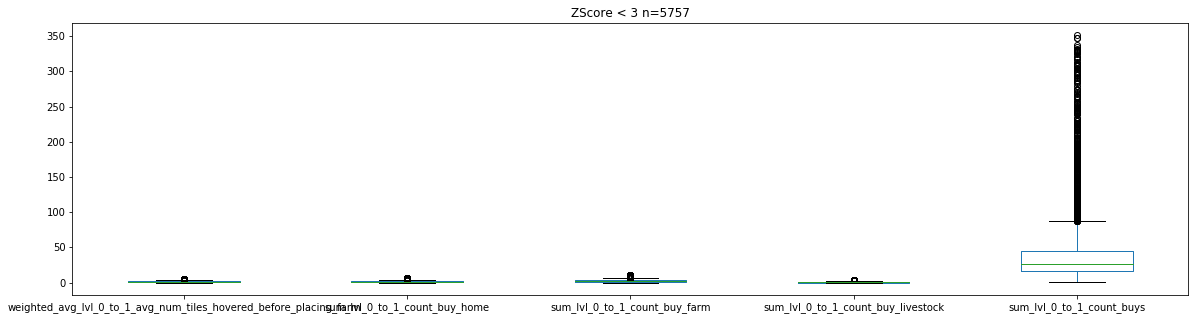

In [0]:
df, meta = cu.full_filter(cu.getCrystalDecJanLogDF, options)

In [0]:
print(*meta,sep='\n')

Import from fhttps://github.com/fielddaylab/opengamedata/blob/master/jupyter/lakeland_data/LAKELAND_20191201_to_20191231_b2cf46d_proc.zip?raw=true
Import from fData/Raw Log Data/LAKELAND_20200101_to_20200131_a9720c1_proc.zip
*arg* filter_args = {'one_query': False, 'cont': False, 'max_sessDuration': None, 'min_sessDuration': 300, 'min_lvlend_ActiveEventCount': 3, 'min_lvlstart_ActiveEventCount': 3, 'min_sessActiveEventCount': 10, 'no_debug': True, 'lvlend': None, 'lvlstart': None, 'only_query_list': False, 'query_list': ['sess_avg_num_tiles_hovered_before_placing_home > 1'], 'fillna': 0, 'verbose': False}
Query: Intial Shape, output_shape: (32227, 1600)
Query: debug == 0, output_shape: (32221, 1600)
Query: sess_ActiveEventCount >= 10, output_shape: (26935, 1600)
Query: sessDuration >= 300, output_shape: (16110, 1600)
Query: _continue == 0, output_shape: (10592, 1600)
Query: sess_avg_num_tiles_hovered_before_placing_home > 1, output_shape: (9687, 1600)
Filled NaN with 0
*arg* new_feat_a

In [0]:
from Notebooks.Clustering import cluster_workflow as cw
from pathlib import Path
importlib.reload(cw)
Path(base_savepath).mkdir(parents=True, exist_ok=True)
with open(f'{base_savepath}/meta.txt', 'w+') as f:
    print(*meta, sep='\n',file=f)
# plt.savefig(base_savepath+'/outlier_box.png',dpi=dpi)
w = cw.Workflow()

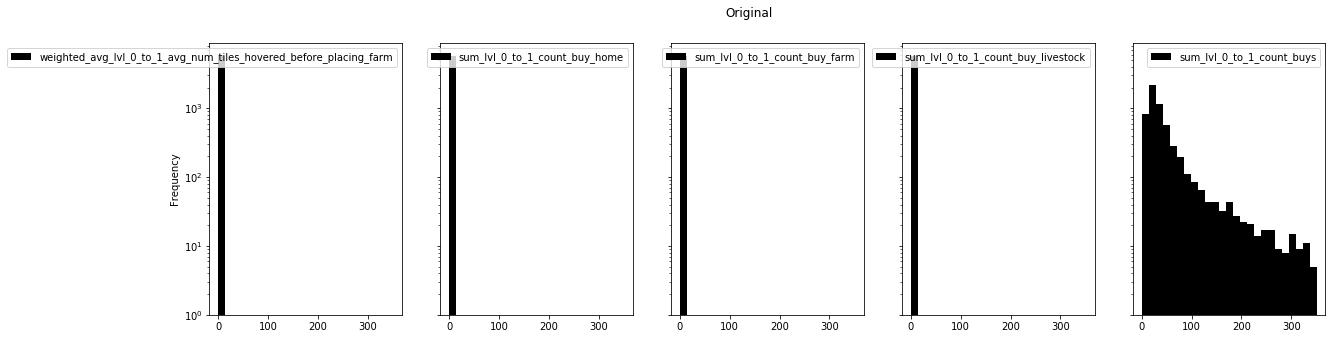

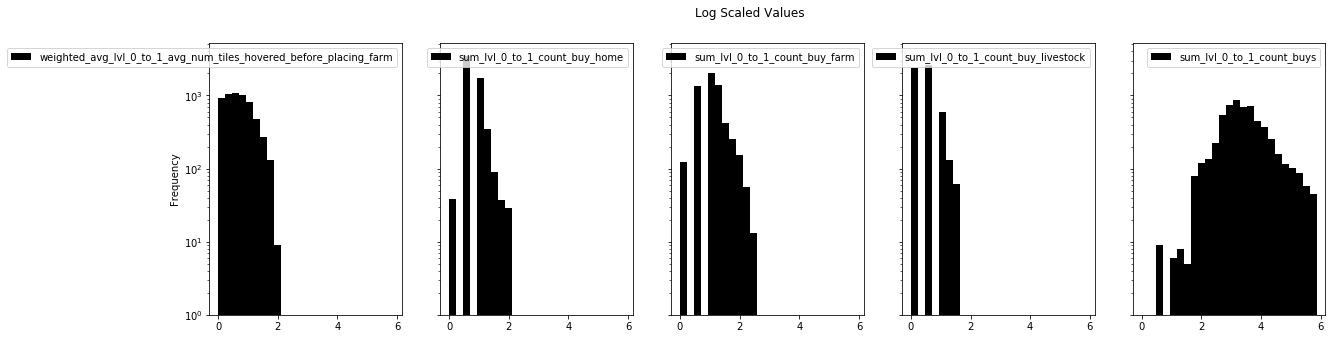

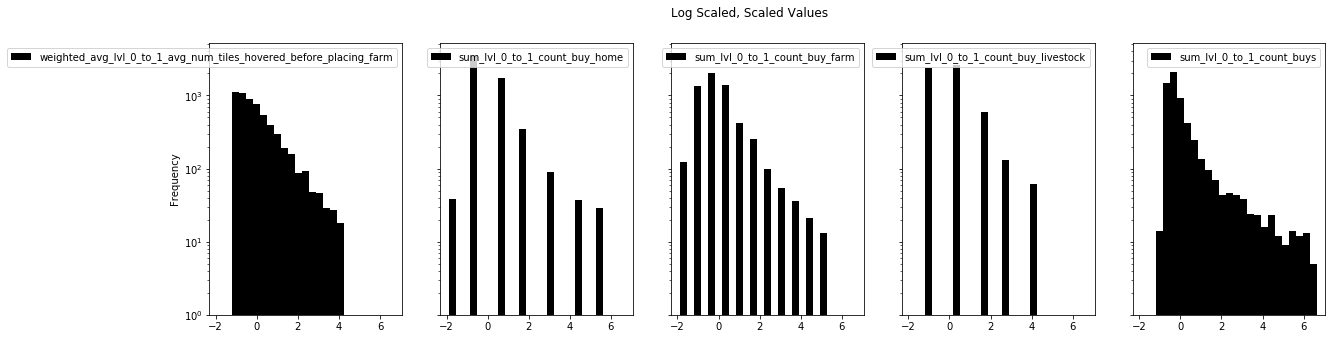

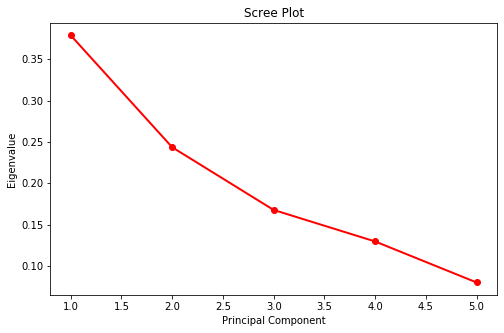

In [0]:
w.Histogram(df,title='Original')
plt.savefig(base_savepath+'/original_hist.png',dpi=dpi)
tdf = pd.DataFrame(np.log(df.to_numpy()+1),columns=df.columns)
w.Histogram(tdf,title='Log Scaled Values')
plt.savefig(base_savepath+'/log_scaled_hist.png',dpi=dpi)
tdf, tmeta = w.Scaled(df)
w.Histogram(tdf,title='Log Scaled, Scaled Values')
plt.savefig(base_savepath+'/log_scaled_scaled.png',dpi=dpi)
w.Scree(tdf)
plt.savefig(base_savepath+'/scree.png',dpi=dpi)

#### Choose PCA Dims From Scree




In [0]:
pca_dims = 2 #@param {type:"integer"}



k=3


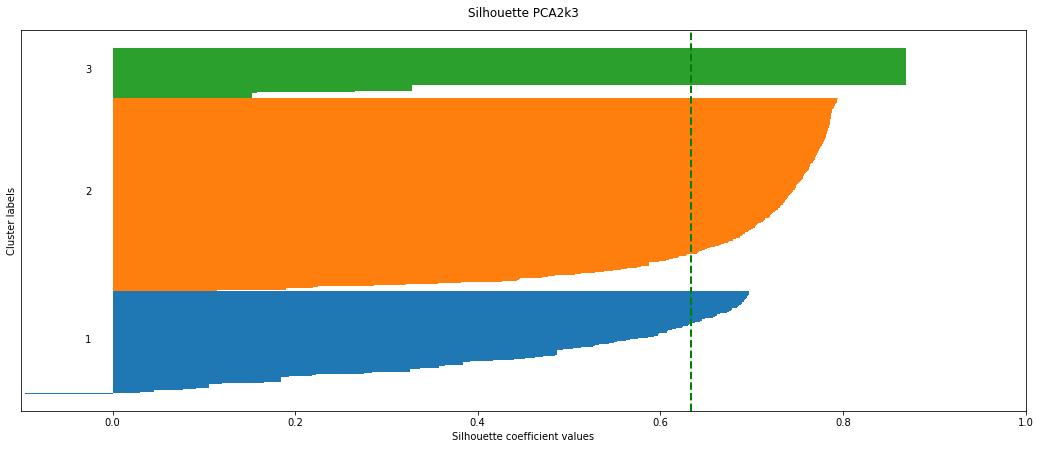



k=4


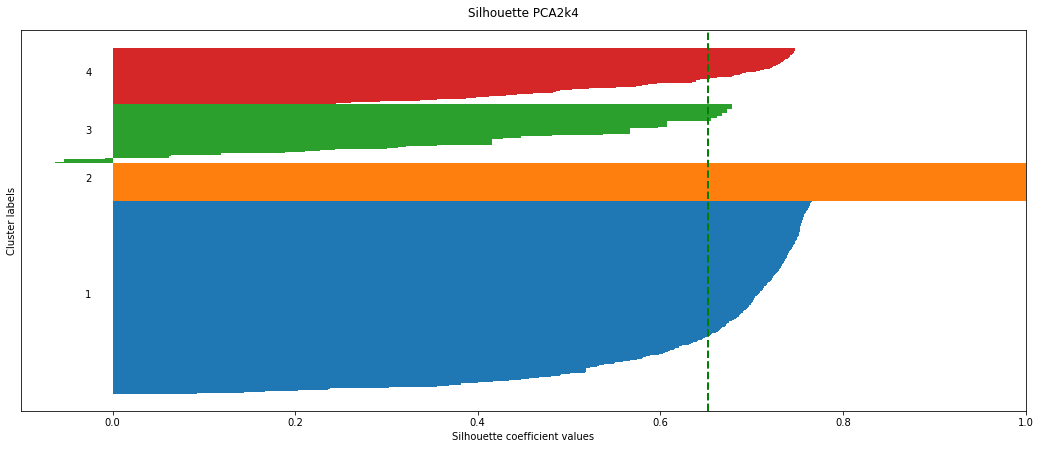



k=5


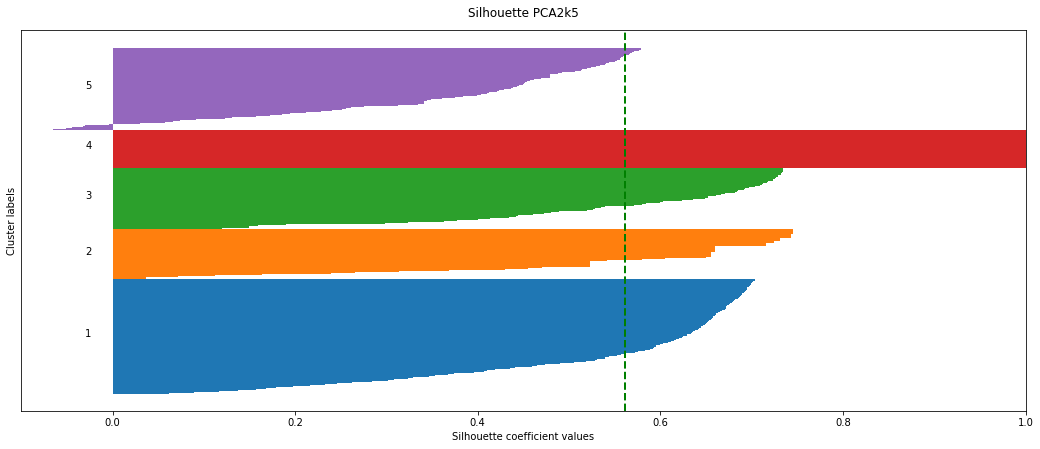



k=6


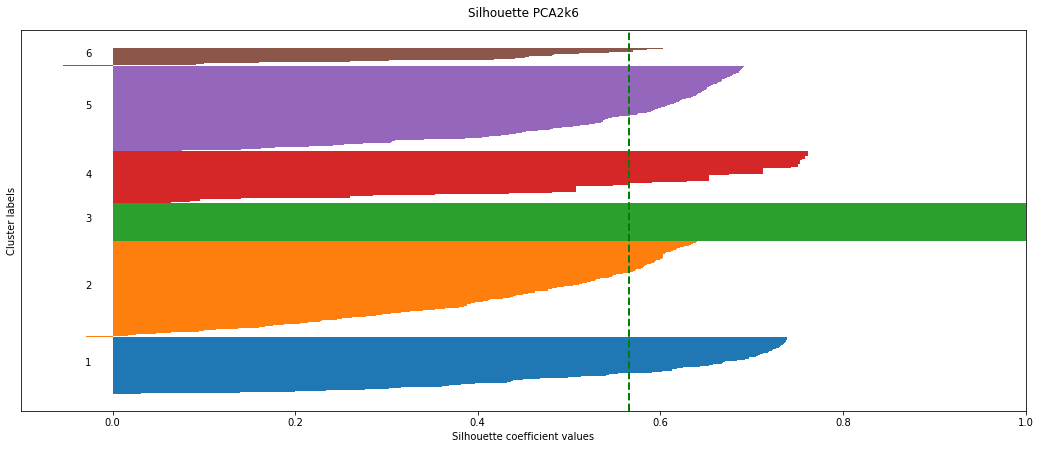



k=7


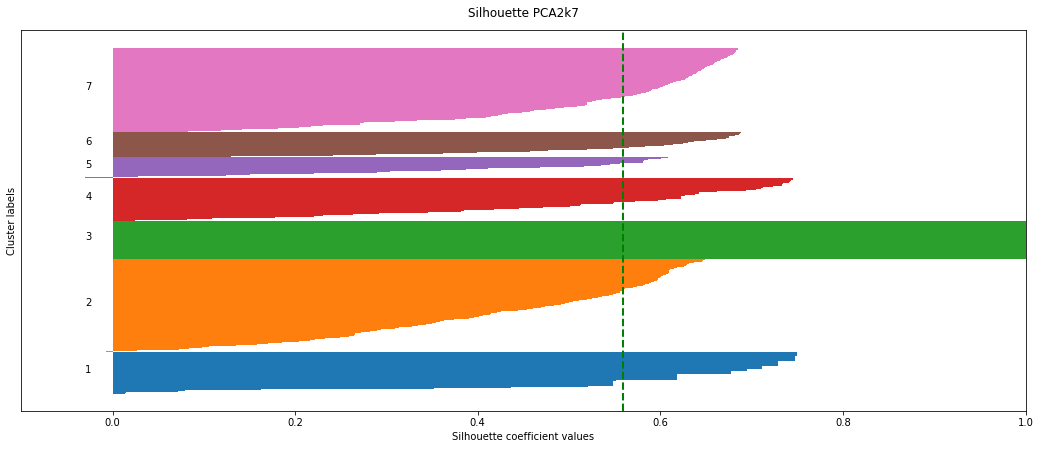



k=8


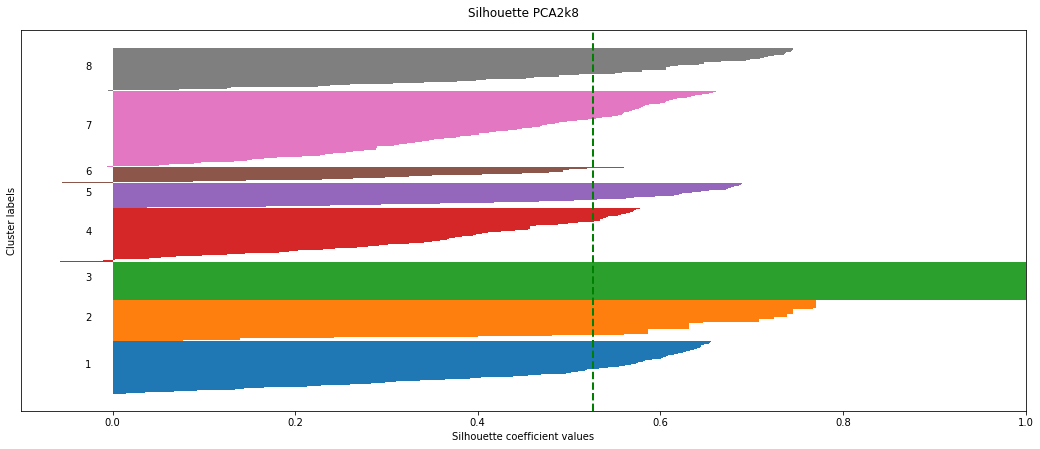



k=9


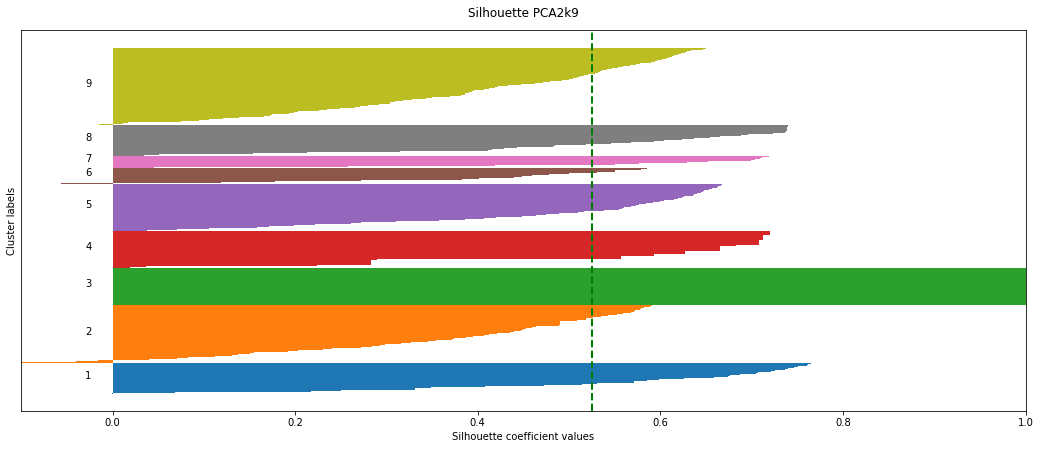

In [0]:
tdf = pd.DataFrame(np.log(df.to_numpy()+1),columns=df.columns)
tdf, tmeta = w.PCA(tdf, pca_dims)
for i in range(3,10):
    print(f'\n\nk={i}')
    labels,tmeta = w.Cluster(tdf,i)
    title = f'Silhouette PCA{pca_dims}k{i}'
    w.Silhouettes(tdf,labels,title=title)
    plt.savefig(f'{base_savepath}/{title}.png',dpi=150)
    plt.show()

#### Choose k from Scree Plots

In [0]:
kmeans_clusters =  5#@param {type:"integer"}
save_dir = f'{base_savepath}/z{options.zthresh}pca{pca_dims}k{kmeans_clusters}'
print(f'Now Saving to: {save_dir}/')
Path(save_dir).mkdir(parents=True, exist_ok=True)

Now Saving to: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/


#### Run Clustering

In [0]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, Normalizer,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from pathlib import Path
from math import pi

def add_cluster_features_to_df(pipeline, df, data):
  pipeline.fit(data)
  PCA_dims = pipeline[:-1].transform(data)
  clustering = pipeline[-1]
  labels = clustering.predict(PCA_dims)
  distances = []
  for a,l in zip(PCA_dims, labels):
    b =  clustering.cluster_centers_[l]
    distances.append(a-b)
  df['label'] = labels
  df['PCA1 Offset'] = np.array(distances)[:,0]
  df['PCA2 Offset'] = np.array(distances)[:,1]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1599) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter/Notebooks/Clustering/cluster_utils.py:254: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sum_prefix+fn] = tdf.sum(axis=1)
/content/drive/My Drive/Field Day/Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter/Notebooks/Clustering/cluster_utils.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm  \
sessID            num_play                                                                      
19110002150060536 1                                                  1.172414                   
19110008292229944 1                                                  0.515152                   
19110010164029110 1                                                  3.521739                   
19110010203440010 1                                                  5.000000                   
                  3                                                  1.631579                   
...                                                                       ...                   
20000622414876850 1                                                  1.304348                   
20000623254750504 3                                                  0.176471                   
20010608100268980 1                                                  0.339623                   
20010608250817020 1                                                  0.250000                   
20010614191119680 1                                                  2.085714                   

                            sum_lvl_0_to_1_count_buy_home  \
sessID            num_play                                  
19110002150060536 1                                   2.0   
19110008292229944 1                                   2.0   
19110010164029110 1                                   1.0   
19110010203440010 1                                   1.0   
                  3                                   2.0   
...                                                   ...   
20000622414876850 1                                   2.0   
20000623254750504 3                                   2.0   
20010608100268980 1                                   6.0   
20010608250817020 1                                   2.0   
20010614191119680 1                                   1.0   

                            sum_lvl_0_to_1_count_buy_farm  \
sessID            num_play                                  
19110002150060536 1                                   3.0   
19110008292229944 1                                   2.0   
19110010164029110 1                                   2.0   
19110010203440010 1                                   3.0   
                  3                                   1.0   
...                                                   ...   
20000622414876850 1                                   3.0   
20000623254750504 3                                   3.0   
20010608100268980 1                                   2.0   
20010608250817020 1                                   1.0   
20010614191119680 1                                   3.0   

                            sum_lvl_0_to_1_count_buy_livestock  \
sessID            num_play                                       
19110002150060536 1                                        1.0   
19110008292229944 1                                        1.0   
19110010164029110 1                                        2.0   
19110010203440010 1                                        1.0   
                  3                                        0.0   
...                                                        ...   
20000622414876850 1                                        1.0   
20000623254750504 3                                        1.0   
20010608100268980 1                                        3.0   
20010608250817020 1                                        0.0   
20010614191119680 1                                        0.0   

                            sum_lvl_0_to_1_count_buys  label  PCA1 Offset  \
sessID            num_play                                                  
19110002150060536 1                              29.0      2    -0.235260   
19110008292229944 1                              33.0      2    -0.108211   
19110010164

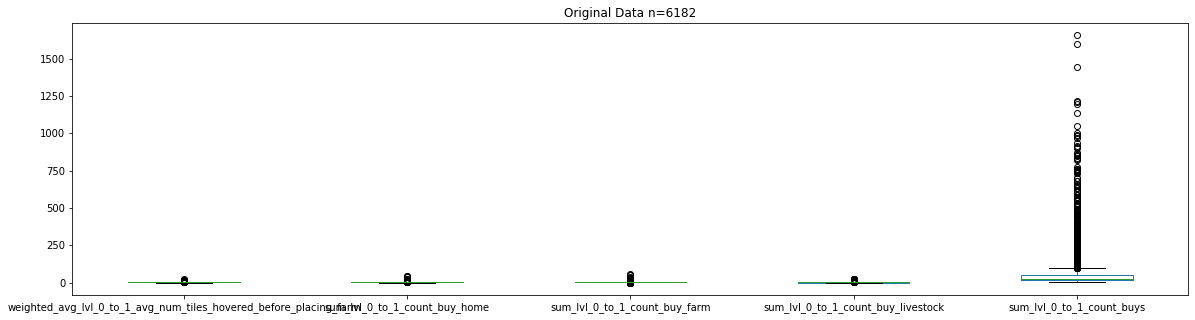

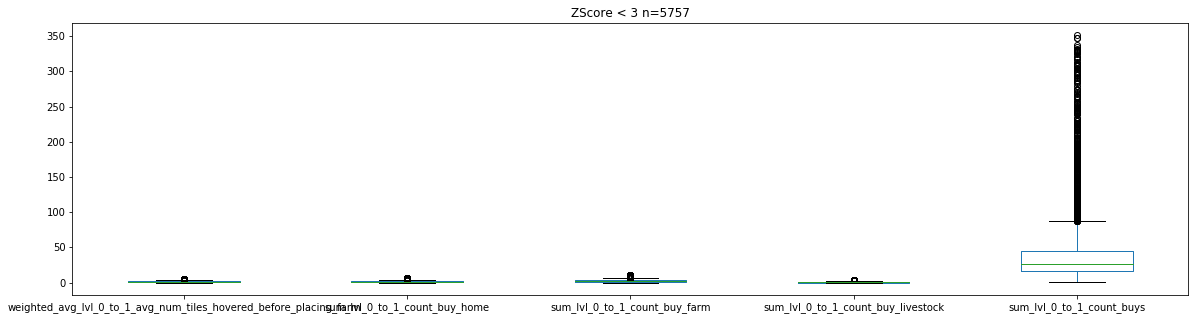

In [0]:
# get df and meta again to make sure that hasn't been overwritten by subsequent cells
df, meta = cu.full_filter(cu.getCrystalDecJanLogDF, options)

# save meta and cluster csv
pipeline = make_pipeline(FunctionTransformer(np.log1p, validate=True), RobustScaler(),PCA(pca_dims),KMeans(kmeans_clusters))
meta.append(f'Pipeline: {pipeline}')
with open(f'{save_dir}/meta.txt', 'w+') as f:
    print(*meta, sep='\n',file=f)
add_cluster_features_to_df(pipeline, df, df.to_numpy())
df.to_csv(f'{save_dir}/clusters.csv')
df

## Show some stats.

In [0]:
stddev_df = pd.DataFrame()
clusters = set(df['label'])
for c in clusters:
  cluster_df = df[df['label']==c]
  stddev_df[f'C{c}'] = cluster_df.describe().loc['mean',:]
stddev_df

,C0,C1,C2,C3,C4
weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm,1.637295,0.471197,1.071611,2.241987,0.312841
sum_lvl_0_to_1_count_buy_home,1.071071,1.228763,1.944700,1.435609,2.059163
sum_lvl_0_to_1_count_buy_farm,1.146146,1.675112,3.280338,2.574947,3.909091
sum_lvl_0_to_1_count_buy_livestock,0.000000,0.317437,1.370968,0.931738,1.256854
sum_lvl_0_to_1_count_buys,12.685686,43.750373,37.591398,19.951443,135.562771
label,0.000000,1.000000,2.000000,3.000000,4.000000
PCA1 Offset,-0.000250,0.000338,-0.004210,-0.003569,0.000119
PCA2 Offset,0.000696,0.001001,-0.000726,0.001114,-0.002077


In [0]:
count_df = pd.DataFrame()
clusters = set(df['label'])
for c in clusters:
  cluster_df = df[df['label']==c]
  count_df[f'C{c}'] = cluster_df.describe().loc['count',:]
count_df

,C0,C1,C2,C3,C4
weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm,999.0,1342.0,1302.0,1421.0,693.0
sum_lvl_0_to_1_count_buy_home,999.0,1342.0,1302.0,1421.0,693.0
sum_lvl_0_to_1_count_buy_farm,999.0,1342.0,1302.0,1421.0,693.0
sum_lvl_0_to_1_count_buy_livestock,999.0,1342.0,1302.0,1421.0,693.0
sum_lvl_0_to_1_count_buys,999.0,1342.0,1302.0,1421.0,693.0
label,999.0,1342.0,1302.0,1421.0,693.0
PCA1 Offset,999.0,1342.0,1302.0,1421.0,693.0
PCA2 Offset,999.0,1342.0,1302.0,1421.0,693.0


In [0]:
full_df = df.describe()
full_df

,weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm,sum_lvl_0_to_1_count_buy_home,sum_lvl_0_to_1_count_buy_farm,sum_lvl_0_to_1_count_buy_livestock,sum_lvl_0_to_1_count_buys,label,PCA1 Offset,PCA2 Offset
count,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000
mean,1.227358,1.514330,2.437381,0.765329,42.144520,1.907417,-0.001783,0.000215
std,1.069249,0.805651,1.441750,0.803912,46.537893,1.283458,0.431565,0.502080
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.628813,-1.986375
25%,0.413793,1.000000,1.000000,0.000000,17.000000,1.000000,-0.318377,-0.350679
50%,0.962963,1.000000,2.000000,1.000000,27.000000,2.000000,0.002315,-0.003517
75%,1.733333,2.000000,3.000000,1.000000,45.000000,3.000000,0.304959,0.338155
max,5.689655,6.000000,10.000000,4.000000,351.000000,4.000000,2.199155,2.383956


In [0]:
summary_df = pd.DataFrame(columns=full_df.columns)
clusters = set(df['label'])
cluster_dict = {}
for c in clusters:
  cluster_dict[c] = df[df['label']==c]
  cluster_df = cluster_dict[c].describe()
  summary_df.loc[f'C{c}_zscore',:] = (cluster_df.loc['mean',:] - full_df.loc['mean',:]) / full_df.loc['std',:]
  summary_df.loc[f'C{c}_%mean',:] = (cluster_df.loc['mean',:] / full_df.loc['mean',:])*100
  summary_df.loc[f'C{c}_%std',:] = (cluster_df.loc['std',:] / full_df.loc['std',:])*100
summary_df = summary_df.apply(lambda x: (x*100)//1*.01)
summary_df
# summary_df.reindex([(f'C{c}',s) for c in clusters for s in ['zscore','%mean','%clusters']])

,weighted_avg_lvl_0_to_1_avg_num_tiles_hovered_before_placing_farm,sum_lvl_0_to_1_count_buy_home,sum_lvl_0_to_1_count_buy_farm,sum_lvl_0_to_1_count_buy_livestock,sum_lvl_0_to_1_count_buys,label,PCA1 Offset,PCA2 Offset
C0_zscore,0.38,-0.56,-0.9,-0.96,-0.64,-1.49,0,0
C0_%mean,133.39,70.72,47.02,0,30.1,0,14,323.93
C0_%std,110.38,44.79,39.19,0,11.87,0,110.69,119.25
C1_zscore,-0.71,-0.36,-0.53,-0.56,0.03,-0.71,0,0
C1_%mean,38.39,81.14,68.72,41.47,103.81,52.42,-18.96,466.11
C1_%std,33.34,68.19,55.29,59.88,59.91,0,108.92,95.13
C2_zscore,-0.15,0.53,0.58,0.75,-0.1,0.07,-0.01,-0.01
C2_%mean,87.31,128.41,134.58,179.13,89.19,104.85,236.11,-338.01
C2_%std,54.24,106.51,95.46,96.05,26.56,0,80.57,88.13
C3_zscore,0.94,-0.1,0.09,0.2,-0.48,0.85,-0.01,0


## Scatter Plot

In [0]:
colors = {i:v for i,v in enumerate(plt.cm.get_cmap('tab10').colors)}

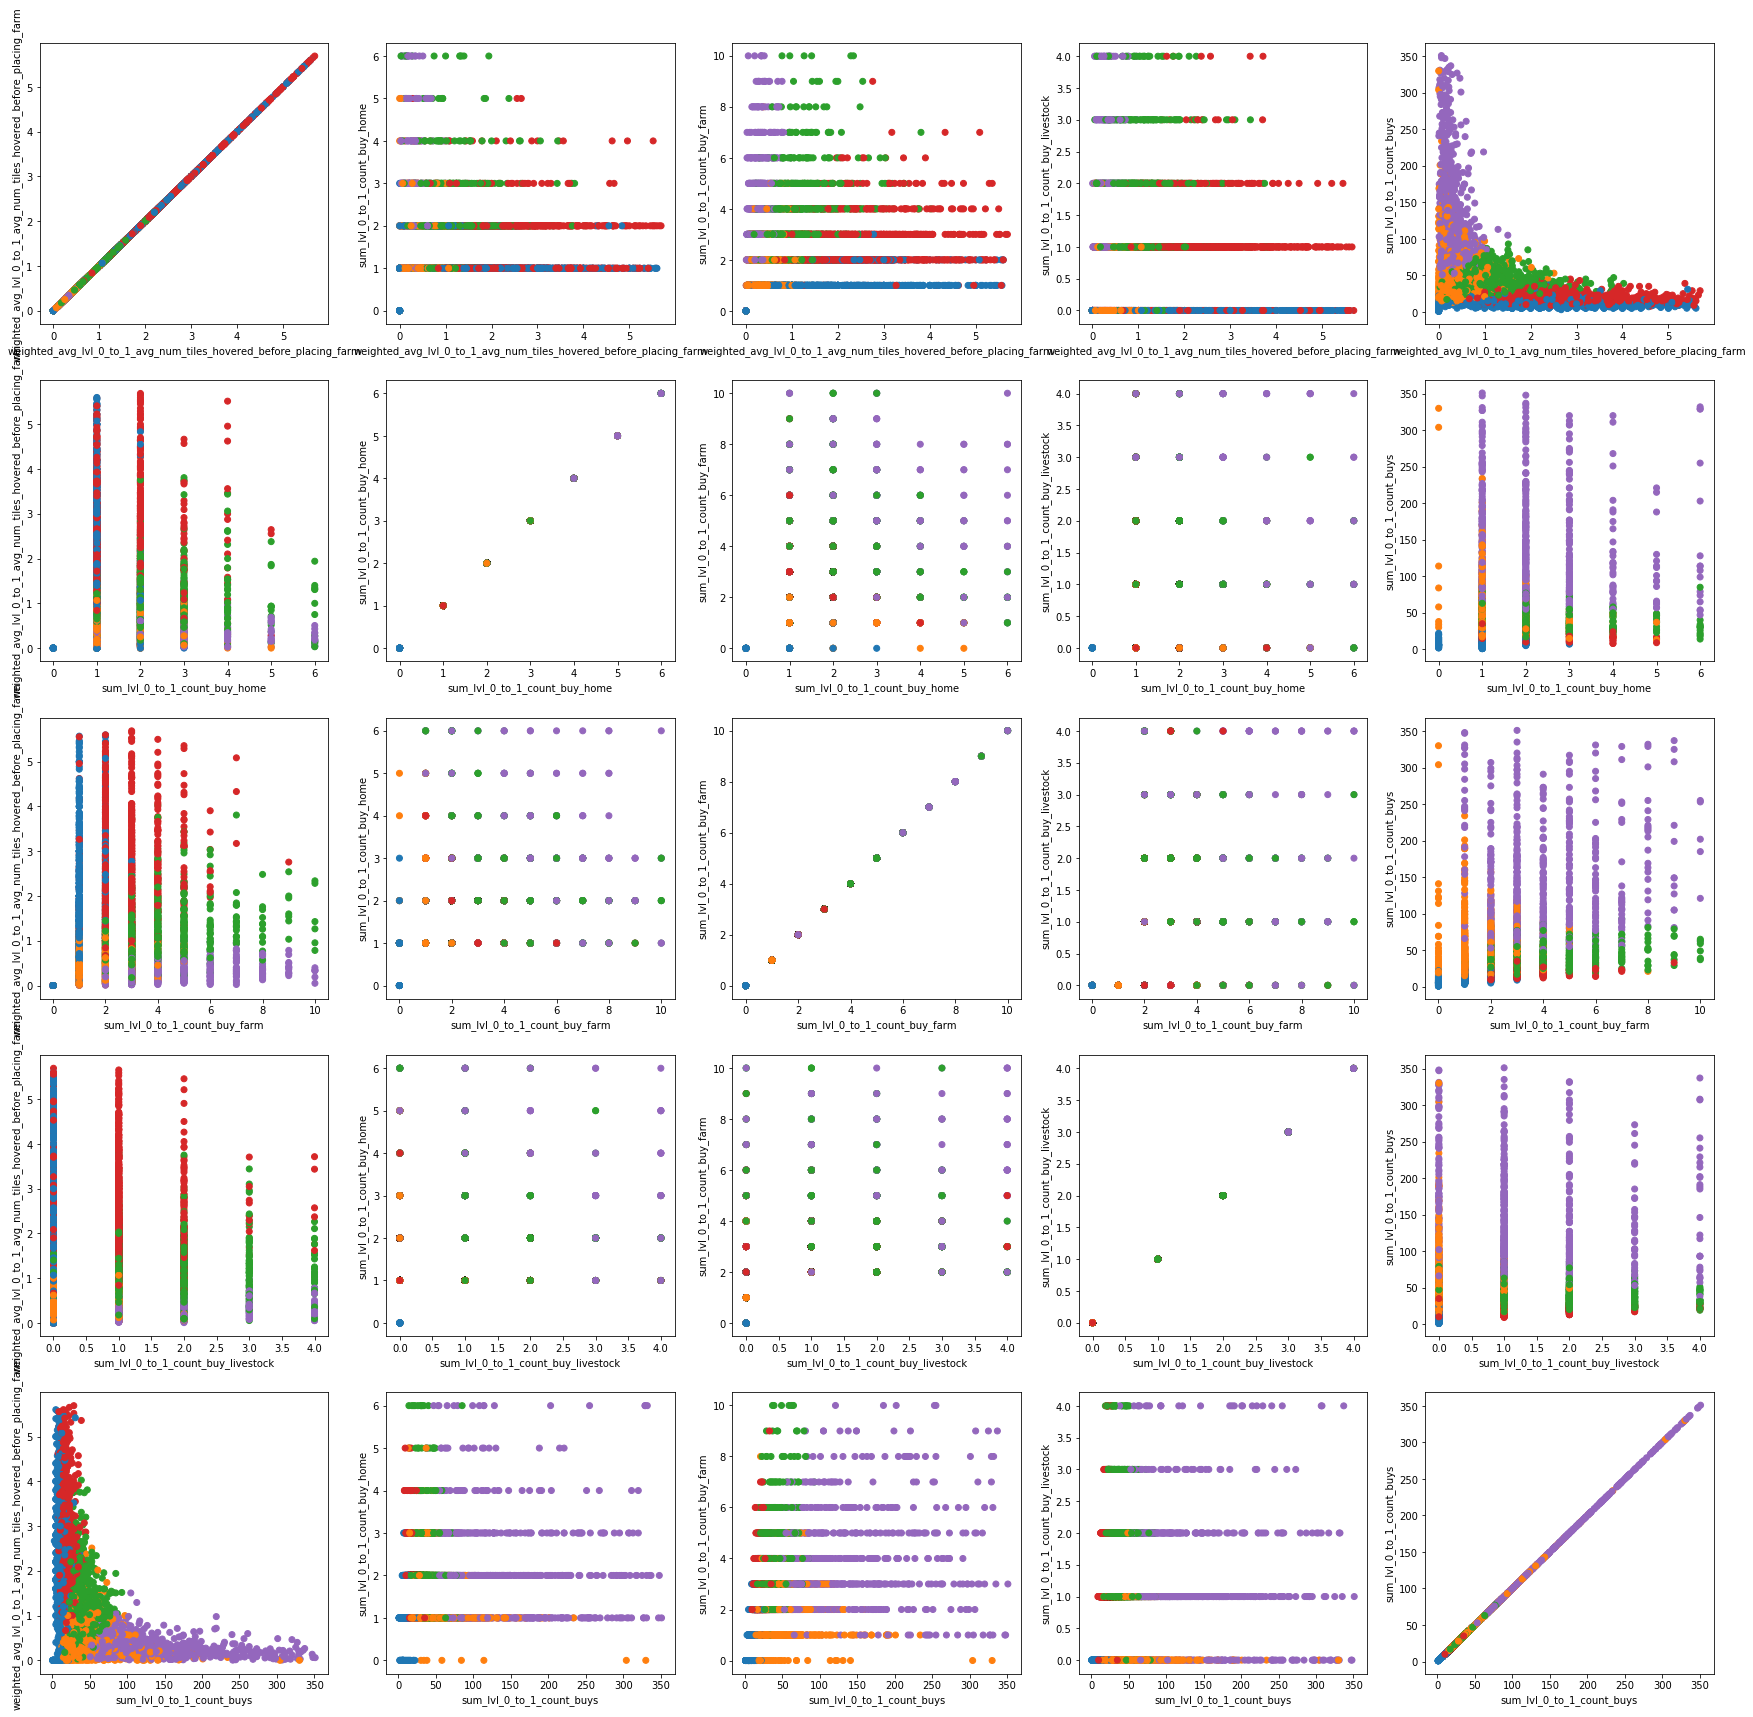

In [0]:
num_cols = len(df.columns) - 3
color_array = [colors[c] for c in df['label']]
fig, axs = plt.subplots(num_cols,num_cols,figsize=(30,30))
for x in range(num_cols):
  for y in range(num_cols):
    axs[x,y].scatter(df.iloc[:,x],df.iloc[:,y],c=color_array)
    axs[x,y].set_xlabel(df.columns[x])
    axs[x,y].set_ylabel(df.columns[y])
    # axs[x,y].set_ylim(0,.01)

In [0]:
fig.savefig(f'{save_dir}/scatterplot.png',dpi=dpi/2)

In [0]:
categories = options.finalfeats_readable

[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [0.38, -0.56, -0.9, -0.96, -0.64, 0.38]
[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [-0.71, -0.36, -0.53, -0.56, 0.03, -0.71]
[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [-0.15, 0.53, 0.58, 0.75, -0.1, -0.15]
[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [0.9400000000000001, -0.1, 0.09, 0.2, -0.48, 0.9400000000000001]
[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [-0.86, 0.67, 1.02, 0.61, 2.0, -0.86]
[0.7853981633974483, 2.0420352248333655, 3.2986722862692828, 4.5553093477052, 5.811946409141117, 0.7853981633974483] [133.39000000000001, 70.72, 47.02, 0.0, 30.1, 133.39000000000001]
[0.78539

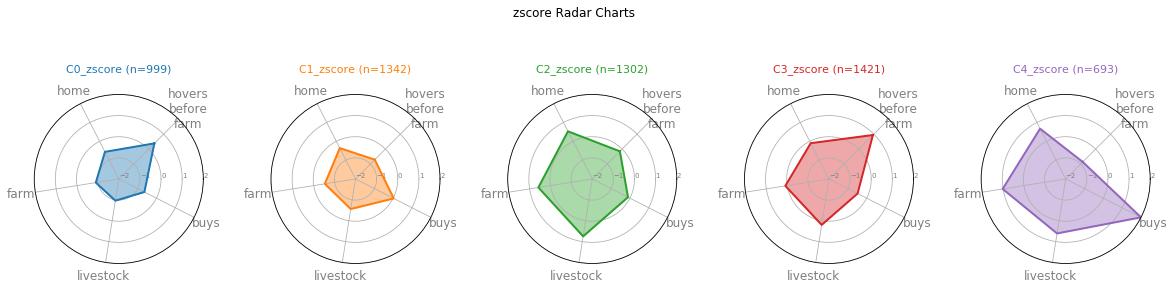

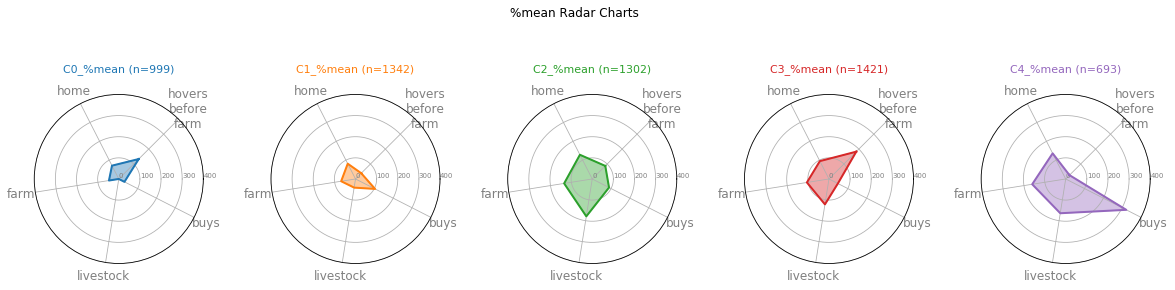

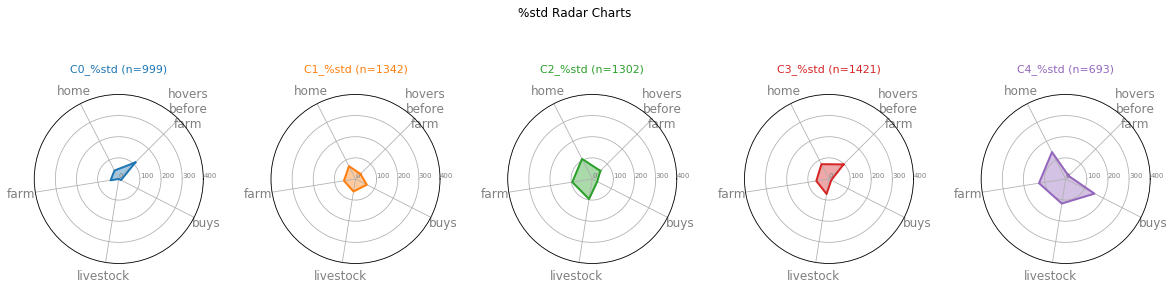

In [0]:
def make_spider(color,i):
  offset = .25*pi
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi + offset for n in range(N)]
  angles += angles[:1]
  ax = plt.subplot(nrows,ncols,i+1, polar=True)
  plt.xticks(angles[:-1], categories, color='grey', size=12)
  ax.set_rlabel_position(0)
  if var == 'zscore':
    plt.yticks([-2,-1,0,1,2], color="grey", size=7)
    plt.ylim(-2,2)
  elif '%' in var:
    plt.yticks(range(0,1000,100),color="grey", size=7)
    plt.ylim(0,400)
  values = list(tdf.iloc[i,:-3])
  values += values[:1]
  graph_name = tdf.index[i]
  print(angles,values)
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)
  plt.title(graph_name+f' (n={len(cluster_dict[i])})', size=11, color=color, y=1.1)
  

# number of variable
for var in ['zscore', '%mean','%std']:
  tdf = summary_df.loc[[idx for idx in summary_df.index if var in idx],:]
  if not categories:
    categories = list(tdf.drop(['label','PCA1 Offset','PCA2 Offset'],axis=1).columns)
  N = len(categories)
  num_groups = len(tdf.index)
#   nrows = 2
#   ncols = num_groups//2 if not num_groups%2 else num_groups//2 + 1
  nrows = 1
  ncols = num_groups
  fig = plt.figure(figsize=(20,5))
  fig.suptitle(f'{var} Radar Charts')
  for i in range(num_groups):
    make_spider(colors[i],i)
  fig.subplots_adjust(wspace = 0.4)
  plt.savefig(f'{save_dir}/radar_{var}.png',dpi=600)


In [0]:
print(cluster_dict.keys())

dict_keys([0, 1, 2, 3, 4])


### Look at correlations to other features
#### Upload full df

In [0]:
import urllib
from zipfile import ZipFile
from io import BytesIO
clusters = list(range(kmeans_clusters))
colors = w.color_dict
DecJanLogDF, meta = cu.getCrystalDecJanLogDF()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (1599) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [0]:
DecJanLogDF

lvl0_EventCount  lvl1_EventCount  lvl2_EventCount  \
sessID            num_play                                                      
19110002150060536 1                     133            181.0             81.0   
19110007194177108 1                      91            172.0             56.0   
                  2                     184              NaN              NaN   
19110008292229944 1                     118            183.0            156.0   
19110008450097140 1                     272            246.0             12.0   
...                                     ...              ...              ...   
20010608100268980 1                      65            117.0             94.0   
20010608250817020 1                       2             83.0             21.0   
20010610463627732 1                      76              NaN              NaN   
20010614191119680 1                     116             80.0            102.0   
20010614382862496 1                     181            123.0            118.0   

                            lvl3_EventCount  lvl4_EventCount  lvl5_EventCount  \
sessID            num_play                                                      
19110002150060536 1                     NaN              NaN              NaN   
19110007194177108 1                     NaN              NaN              NaN   
                  2                     NaN              NaN              NaN   
19110008292229944 1                     NaN              NaN              NaN   
19110008450097140 1                     NaN              NaN              NaN   
...                                     ...              ...              ...   
20010608100268980 1                     NaN              NaN              NaN   
20010608250817020 1                     NaN              NaN              NaN   
20010610463627732 1                     NaN              NaN              NaN   
20010614191119680 1                    81.0              NaN              NaN   
20010614382862496 1                     7.0              NaN              NaN   

                            lvl6_EventCount  lvl7_EventCount  lvl8_EventCount  \
sessID            num_play                                                      
19110002150060536 1                     NaN              NaN              NaN   
19110007194177108 1                     NaN              NaN              NaN   
                  2                     NaN              NaN              NaN   
19110008292229944 1                     NaN              NaN              NaN   
19110008450097140 1                     NaN              NaN              NaN   
...                                     ...              ...              ...   
20010608100268980 1                     NaN              NaN              NaN   
20010608250817020 1                     NaN              NaN              NaN   
20010610463627732 1                     NaN              NaN              NaN   
20010614191119680 1                     NaN              NaN              NaN   
20010614382862496 1                     NaN              NaN              NaN   

                            lvl9_EventCount  lvl0_ActiveEventCount  \
sessID            num_play                                           
19110002150060536 1                     NaN                   77.0   
19110007194177108 1                     NaN                   51.0   
                  2                     NaN                   50.0   
19110008292229944 1                     NaN                   37.0   
19110008450097140 1                     NaN                   42.0   
...                                     ...                    ...   
20010608100268980 1                     NaN                   26.0   
20010608250817020 1                     NaN                    NaN   
20010610463627732 1                     NaN                   26.0   
20010614191119680 1                     NaN                   69.0   
20010614382862496 1       

In [0]:
from datetime import date
def DecJanLogDF_histogram(fname, xlabel=None, suptitle=None,savefig=False,
                      savefig_prefix=None,save_format='png',bins=50, xlim=None,**kwargs):
  if savefig_prefix is None:
      savefig_prefix = ''
  else:
      savefig_prefix += '_'
  xlabel = xlabel or fname
  suptitle = suptitle or f'Histograms by Cluster: {fname}'
  df_with_feature = df.join(DecJanLogDF[fname])
  fig,axes = plt.subplots(1,4,True,True,figsize=(20,5))
  fig.suptitle(suptitle)
  if xlim:
      plt.xlim(xlim)
  for c,ax in zip(clusters,axes):
    points = df_with_feature.loc[df_with_feature['label']==c,fname]
    ax.hist(points,color=colors[c],bins=bins,**kwargs)
    ax.set_ylabel('Num Players')
    ax.set_title(f'C{c} n={len(points)}')
    ax.set_xlabel(xlabel)
  if savefig:
    savepath = save_dir+'/'+savefig_prefix+suptitle+'.'+save_format
    if os.path.isfile(savepath):
      print('Image already exsits! '+savepath)
    else:
      fig.savefig(savepath, format=save_format)
      print('Saved:', savepath)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: sessDuration.png


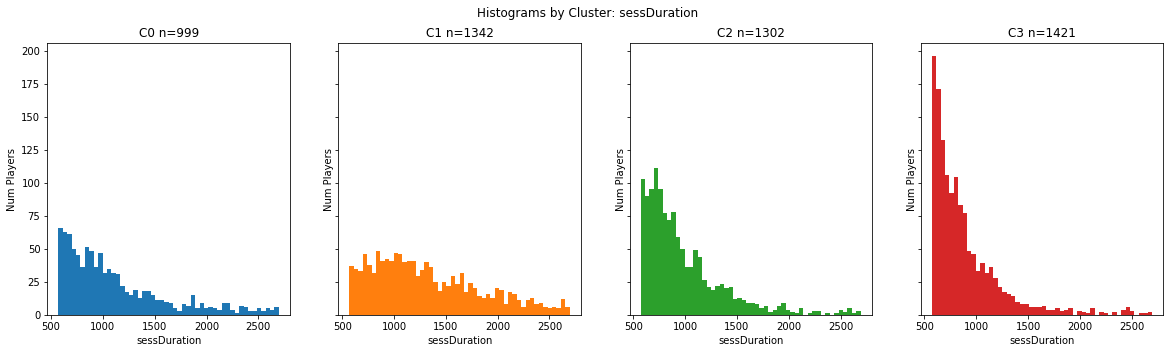

In [0]:
DecJanLogDF = DecJanLogDF.query('sessDuration < 2700')
DecJanLogDF_histogram('sessDuration',savefig=True)

In [0]:
list([x for x in DecJanLogDF.columns if 'death' in x])

['lvl0_count_deaths',
 'lvl1_count_deaths',
 'lvl2_count_deaths',
 'lvl3_count_deaths',
 'lvl4_count_deaths',
 'lvl5_count_deaths',
 'lvl6_count_deaths',
 'lvl7_count_deaths',
 'lvl8_count_deaths',
 'lvl9_count_deaths',
 'sess_time_to_another_death_tutorial',
 'sess_time_to_death_tutorial',
 'sess_time_to_final_death_tutorial',
 'sess_avg_time_per_blurb_in_another_death_tutorial',
 'sess_avg_time_per_blurb_in_death_tutorial',
 'sess_avg_time_per_blurb_in_final_death_tutorial',
 'sess_count_deaths']

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: sess_time_to_death_tutorial.png


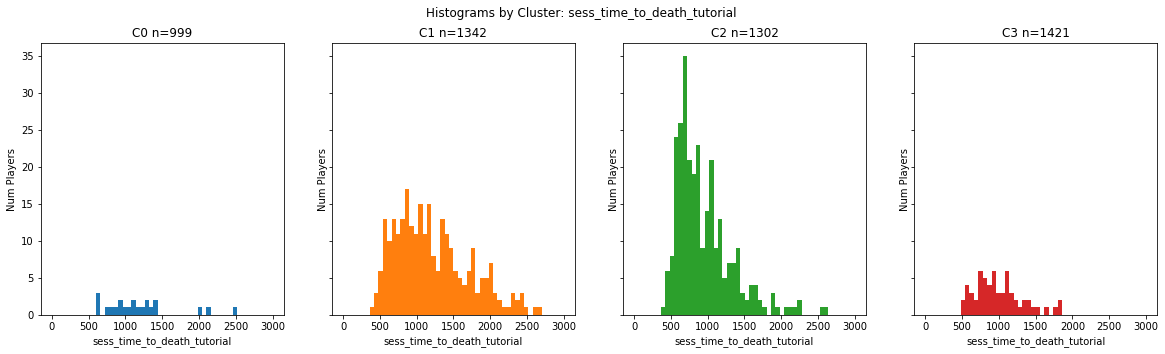

In [0]:
DecJanLogDF_histogram('sess_time_to_death_tutorial',savefig=True,range=(1,3000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: sess_time_to_end_life_tutorial.png


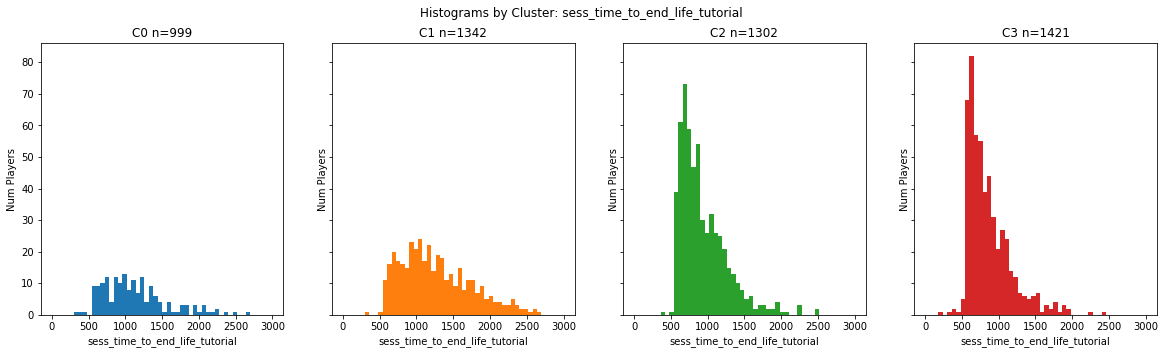

In [0]:
DecJanLogDF_histogram('sess_time_to_end_life_tutorial',savefig=True,range=(1,3000))

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: sess_ActiveEventCount.png


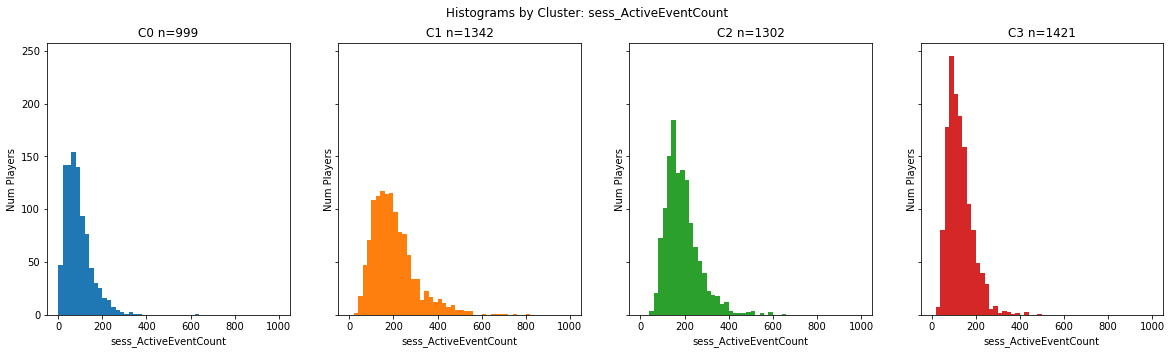

In [0]:
DecJanLogDF_histogram('sess_ActiveEventCount',savefig=True,range=(0,1000))

In [0]:
DecJanLogDF,meta = cu.create_new_base_features(DecJanLogDF)

Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: count_pop_achs.png
Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: count_farm_achs.png
Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: count_money_achs.png
Saved: Results/Lakeland/player_lvl01_logtransform/z3pca2k5/Histograms by Cluster: count_bloom_achs.png


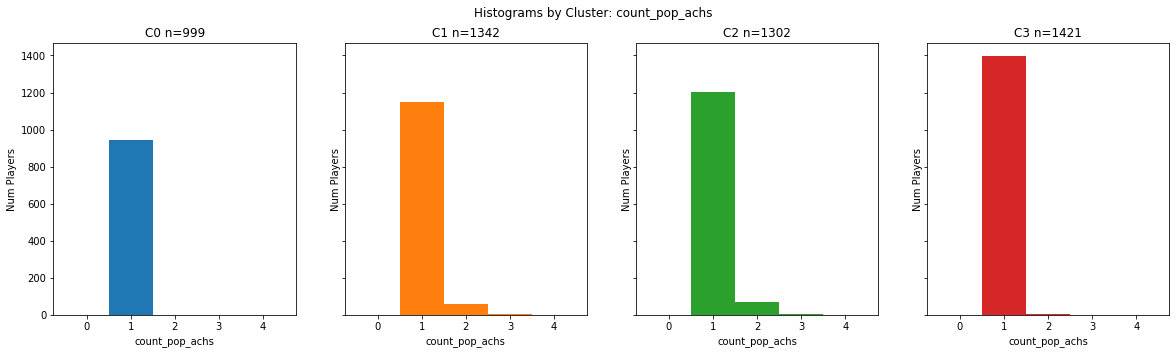

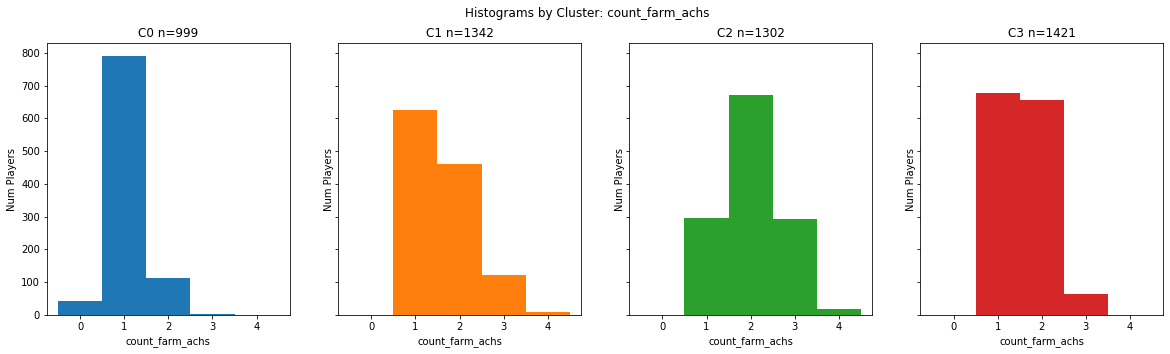

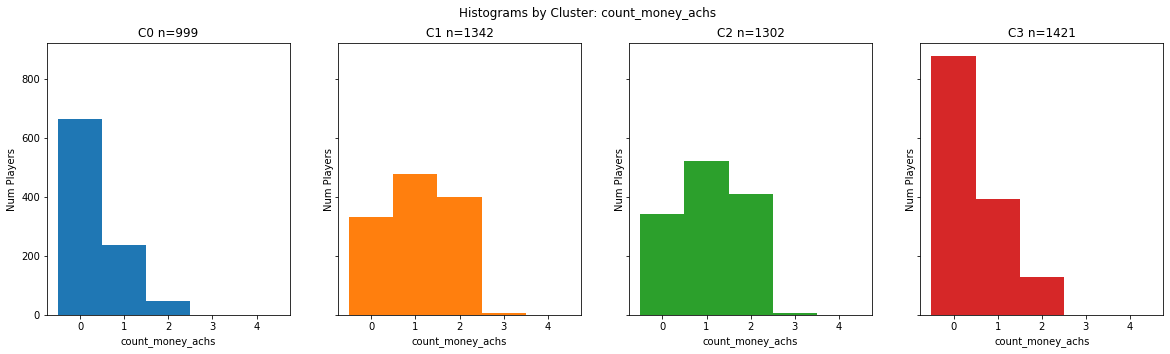

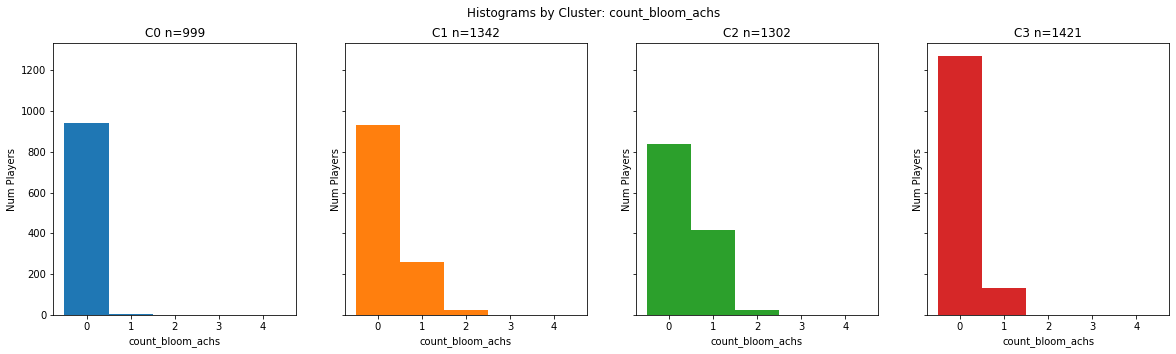

In [0]:
for ach_type in ['pop','farm','money','bloom']:
  DecJanLogDF_histogram(f'count_{ach_type}_achs',bins=[-.5,.5,1.5,2.5,3.5,4.5], savefig=True )

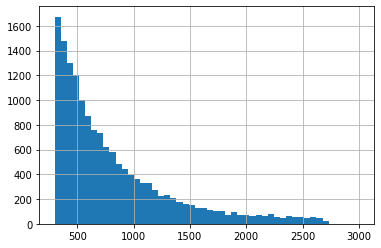

In [0]:
DecJanLogDF['sessDuration'].hist(range=(300,3000),bins=50)
# plt.savefig(graph_fpath('session durations hist jan-dec, range(300,3000)'))